In [1]:
from main import *
import time as time

%matplotlib inline
%load_ext autoreload
%autoreload 2

Input does not affect output.


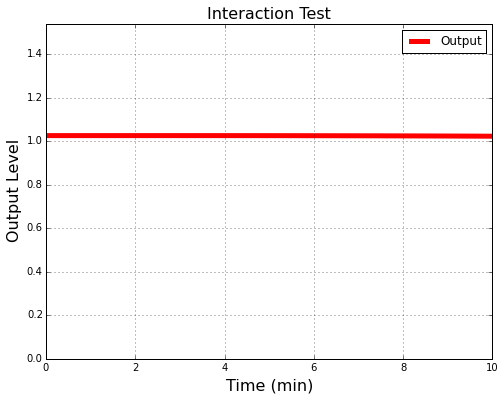

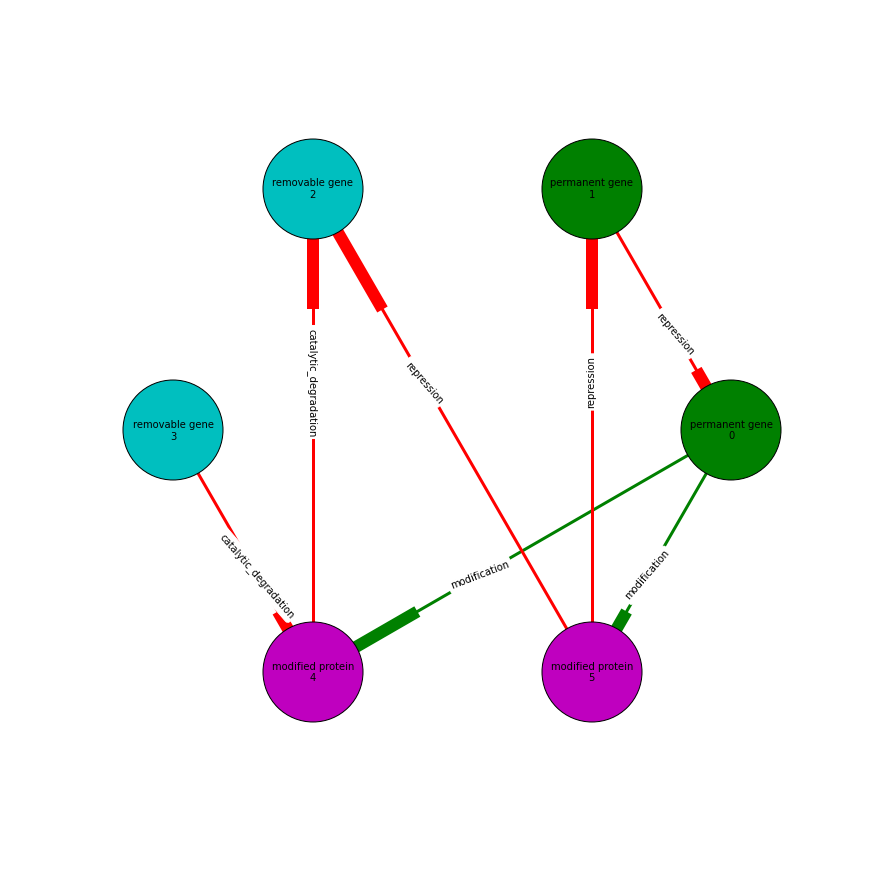

In [19]:
# sequentially mutate cell
cell = Cell(1, permanent_genes=2)
for _ in range(0, 5):
    _, cell = cell.divide(5)
    
# define input and output nodes
input_node = 2
output_node = 1

# run cell interaction check
steady_states = cell.get_steady_states(input_node=input_node, input_magnitude=1)
connected = cell.interaction_check_numerical(input_node=input_node, output_node=output_node, steady_states=steady_states, plot=True)

if connected:
    print('Input affects output.')
else:
    print('Input does not affect output.')
    
cell.show_topology()

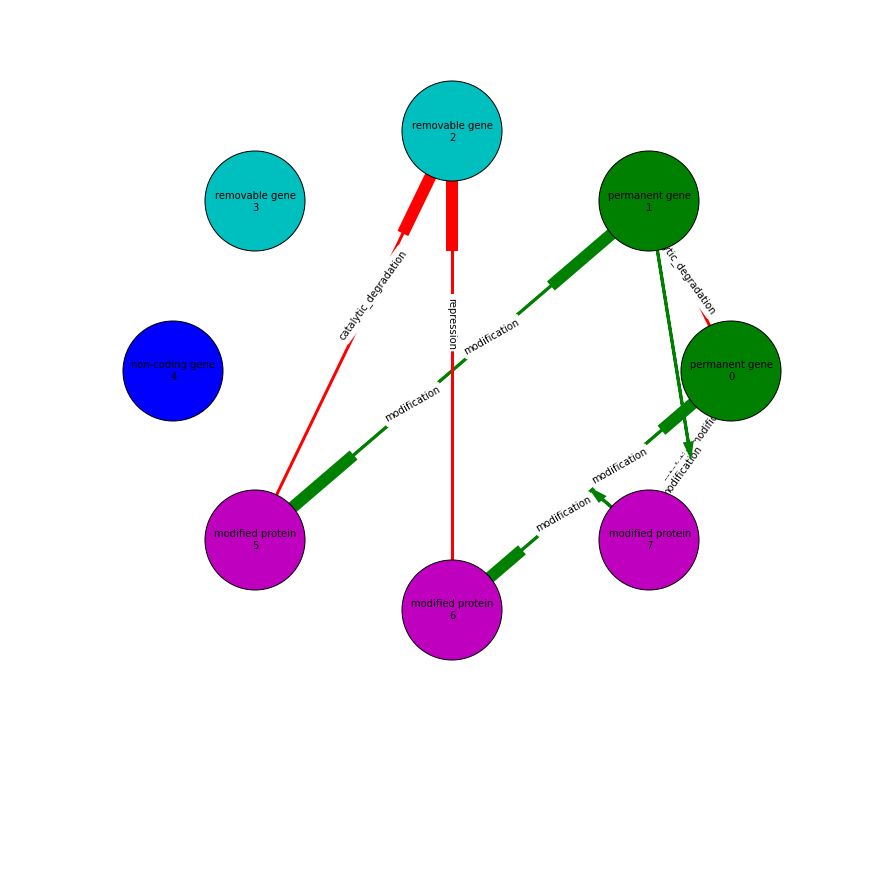

Solver took 6.315291881561279  seconds


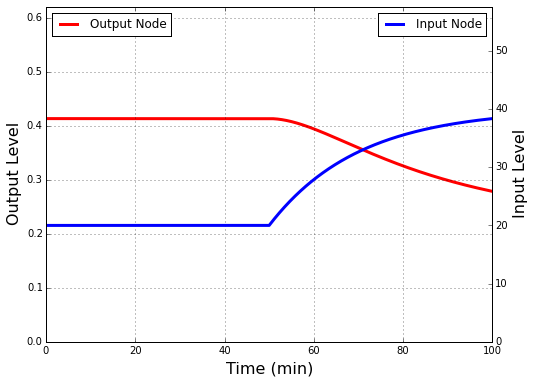

In [41]:
# define input signal
disturbances = [(0, 1), (50, 2), (100, 1)]

# run cell dynamics
start = time.time()
times, states, energy = cell.simulate(disturbances, input_node=input_node, ic=steady_states)
stop = time.time()
print('Solver took', stop-start, ' seconds')
    
# plot input/output trajectories
ax = create_subplot_figure(dim=(1, 1), size=(8, 6))[0]

ax.plot(times, states[cell.key[output_node], :], '-r', linewidth=3, label='Output Node')
ax.set_xlabel('Time (min)', fontsize=16)
ax.set_ylabel('Output Level', fontsize=16)
ax.set_ylim(0, 1.5*np.max(states[cell.key[output_node]]))
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.plot(times, states[cell.key[input_node], :], '-b', linewidth=3, label='Input Node')
ax2.set_ylabel('Input Level', fontsize=16)
ax2.set_ylim(0, 1.5*np.max(states[cell.key[input_node]]))
ax2.legend(loc=1)
_ = ax2.set_xlim(0, times[-1])

Reaction Type           Reactants    Enzymes    Products
----------------------  -----------  ---------  ----------
catalytic_modification  [0]          [1]        [3]
modification            [3]          []         [0]
catalytic_modification  [2]          [3]        [4]
catalytic_degradation   [3]          [1]        []
catalytic_modification  [0]          [2]        [5]


Regulation Type      Target Gene    Transcription Factor
-----------------  -------------  ----------------------
activation                     0                       0
activation                     0                       1


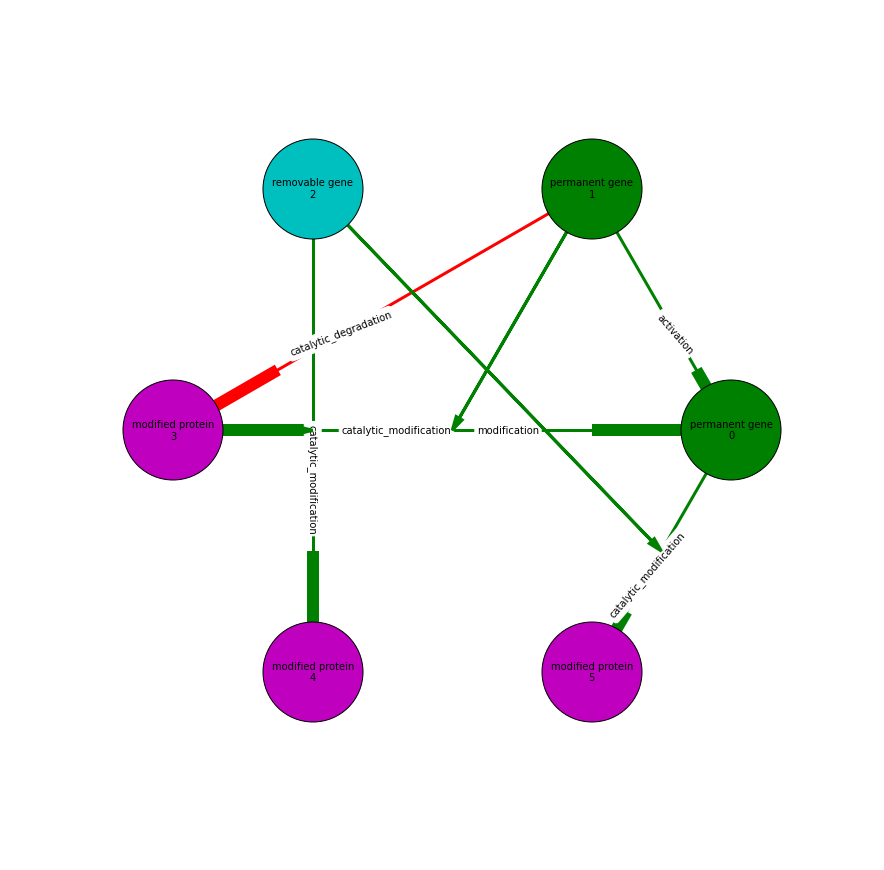

In [42]:
# display cell GRN topology
cell.show_reactions(grn_indices=True)
cell.show_topology()

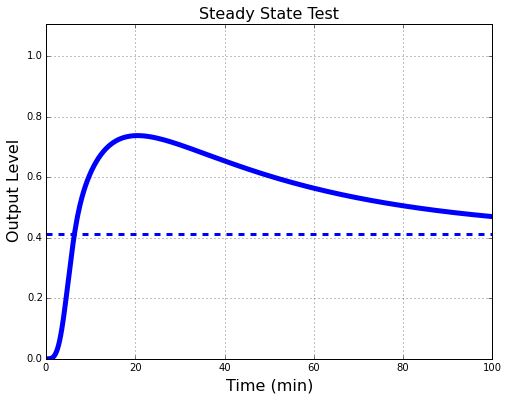

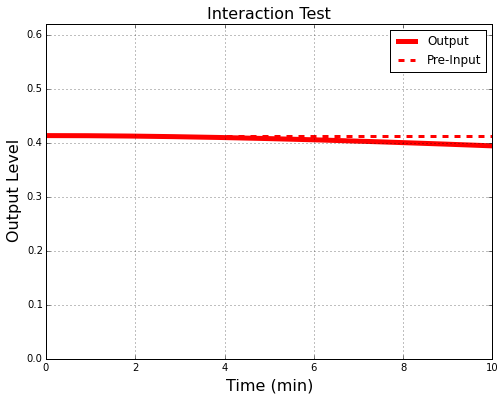

In [43]:
# check it's steady state simulation results
steady_states = cell.get_steady_states(input_node=2, input_magnitude=1)
cell.plot_steady_states(input_node=2, input_magnitude=1, output_node=1)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--b', linewidth=3, label='Steady State')

# check its interaction test results
_ = cell.interaction_check_numerical(input_node=2, output_node=1, steady_states=steady_states, plot=True)
ax = plt.gca()
ax.plot([0, 100], [steady_states[cell.key[1]], steady_states[cell.key[1]]], '--r', linewidth=3, label='Pre-Input')
ax.legend(loc=0)

In [13]:
states, energy, key = cell.simulate(input_signal=[(0, 1), (100, 1)], input_node=2)

Solver took 0.13068509101867676  seconds


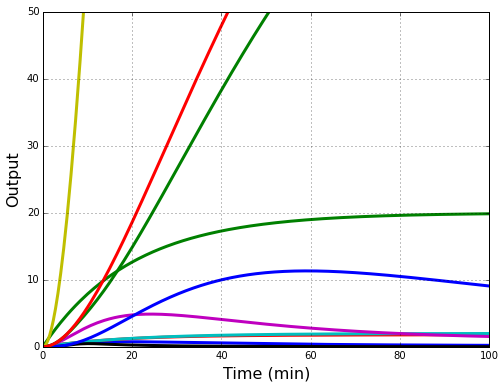

In [26]:
# define input signal
disturbances = [(0, 1), (100, 1)]

# run cell dynamics
start = time.time()
times, states, energy = cell.simulate(disturbances, input_node=input_node)
stop = time.time()
print('Solver took', stop-start, ' seconds')
    
# plot input/output trajectories
ax = create_subplot_figure(dim=(1, 1), size=(8, 6))[0]

for state in states:
    ax.plot(times, state, '-', linewidth=3)
    ax.set_xlabel('Time (min)', fontsize=16)
    ax.set_ylabel('Output', fontsize=16)
    ax.set_ylim(0, 50)